In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from dataprep.eda import plot,create_report   # La bibliothéque dataprep nous permis d'interragir avec les données et creer un reporting

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
listings = pd.read_csv('/content/listings.csv')
listings

In [ ]:
listings.describe()

id  ...  reviews_per_month
count  6.309000e+04  ...       47784.000000
mean   2.432116e+07  ...           0.631386
std    1.451113e+07  ...           0.971980
min    2.577000e+03  ...           0.010000
25%    1.171491e+07  ...           0.110000
50%    2.383585e+07  ...           0.300000
75%    3.734861e+07  ...           0.770000
max    4.913572e+07  ...          32.660000

[8 rows x 40 columns]

#Data preprocessing


In [ ]:
for i in range(0,listings.shape[1]):
    A = listings.isna().sum()
    print(listings.columns[i],":  ",A[i])


id :   0
listing_url :   0
scrape_id :   0
last_scraped :   0
name :   62
description :   1409
neighborhood_overview :   25606
picture_url :   1
host_id :   0
host_url :   0
host_name :   1754
host_since :   1754
host_location :   1883
host_about :   32299
host_response_time :   41209
host_response_rate :   41209
host_acceptance_rate :   37026
host_is_superhost :   1754
host_thumbnail_url :   1754
host_picture_url :   1754
host_neighbourhood :   16042
host_listings_count :   1754
host_total_listings_count :   1754
host_verifications :   0
host_has_profile_pic :   1754
host_identity_verified :   1754
neighbourhood :   25606
neighbourhood_cleansed :   0
neighbourhood_group_cleansed :   63090
latitude :   0
longitude :   0
property_type :   0
room_type :   0
accommodates :   0
bathrooms :   63090
bathrooms_text :   126
bedrooms :   13023
beds :   630
amenities :   0
price :   0
minimum_nights :   0
maximum_nights :   0
minimum_minimum_nights :   13
maximum_minimum_nights :   13
minimum_ma

#On supprime les colonnes 


1.   Ayant beaucoup de valeurs manquant
2.   insignifiantes pour l'étude



In [ ]:
listings = listings.drop(columns =['listing_url','name','amenities', 'scrape_id', 'last_scraped','description', 'neighborhood_overview'] , axis=1)

In [ ]:
listings = listings.drop(columns =['host_name','host_since','host_location','host_about','host_verifications','host_response_time','host_response_rate','host_acceptance_rate',
                                   'host_is_superhost','host_thumbnail_url','host_url','host_picture_url','picture_url','host_neighbourhood',
                                   'host_total_listings_count','host_has_profile_pic','host_identity_verified'] , axis=1)

In [ ]:
listings = listings.drop(columns =['neighbourhood_group_cleansed','bathrooms','bathrooms_text',
                                   'bedrooms','beds'] , axis=1)

In [ ]:
listings = listings.drop(columns =['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
                                   'minimum_nights_avg_ntm','maximum_nights_avg_ntm'] , axis=1)

In [ ]:
listings = listings.drop(columns =['calendar_updated','calendar_last_scraped','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                                   'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','license',
                                   'reviews_per_month','property_type','room_type'] , axis=1)


In [ ]:
listings

id  ...  calculated_host_listings_count_shared_rooms
0          2577  ...                                            0
1          3109  ...                                            0
2          5396  ...                                            0
3          7397  ...                                            0
4          7964  ...                                            0
...         ...  ...                                          ...
63085  49127982  ...                                            0
63086  49134358  ...                                            0
63087  49134419  ...                                            0
63088  49135525  ...                                            0
63089  49135722  ...                                            0

[63090 rows x 25 columns]

In [ ]:
listings.isna().sum()

id                                                  0
host_id                                             0
host_listings_count                              1754
neighbourhood                                   25606
neighbourhood_cleansed                              0
latitude                                            0
longitude                                           0
accommodates                                        0
price                                               0
minimum_nights                                      0
maximum_nights                                      0
has_availability                                    0
availability_30                                     0
availability_60                                     0
availability_90                                     0
availability_365                                    0
number_of_reviews                                   0
number_of_reviews_ltm                               0
number_of_reviews_l30d      

In [ ]:
listings.shape

(63090, 25)

In [ ]:
listings.to_csv(r'Listings_Cleaned.csv', index = False)


In [ ]:
data = pd.read_csv('/content/Listings_Cleaned.csv')
data

id  ...  calculated_host_listings_count_shared_rooms
0          2577  ...                                            0
1          3109  ...                                            0
2          5396  ...                                            0
3          7397  ...                                            0
4          7964  ...                                            0
...         ...  ...                                          ...
63085  49127982  ...                                            0
63086  49134358  ...                                            0
63087  49134419  ...                                            0
63088  49135525  ...                                            0
63089  49135722  ...                                            0

[63090 rows x 25 columns]

##Recodader de la variable has_availability:

In [ ]:
data['has_availability']= data['has_availability'].replace('t',1)
data['has_availability'] = data['has_availability'].replace('f', 0)

In [ ]:
data['has_availability'] 

0        1
1        1
2        1
3        1
4        1
        ..
63085    1
63086    1
63087    1
63088    1
63089    1
Name: has_availability, Length: 63090, dtype: int64

###Traiter la collonnes price: type object to type int64 

In [ ]:

data['price'] = data['price'].str.replace('\$','')
data['price'] = pd.to_numeric(data['price'], errors='coerce').convert_dtypes()


In [ ]:
data

id  ...  calculated_host_listings_count_shared_rooms
0          2577  ...                                            0
1          3109  ...                                            0
2          5396  ...                                            0
3          7397  ...                                            0
4          7964  ...                                            0
...         ...  ...                                          ...
63085  49127982  ...                                            0
63086  49134358  ...                                            0
63087  49134419  ...                                            0
63088  49135525  ...                                            0
63089  49135722  ...                                            0

[63090 rows x 25 columns]

#Separer les données en categorielle, numeriques:

In [ ]:
df = data.copy()

In [ ]:
cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
  if c == object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])

cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [ ]:
# remplacer les variables manquantes des données numeriques par la mediane:
num_data=num_data.fillna(num_data.mean())
num_data.isna().sum()

id                                              0
host_id                                         0
host_listings_count                             0
latitude                                        0
longitude                                       0
accommodates                                    0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
has_availability                                0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0


In [ ]:
# remplacer les variables manquantes des données categorielles par 0: 
cat_data = cat_data.replace(np.nan, 0)
cat_data

neighbourhood  ... instant_bookable
0                                 0  ...                f
1      Paris, Île-de-France, France  ...                f
2      Paris, Ile-de-France, France  ...                f
3                                 0  ...                f
4                                 0  ...                f
...                             ...  ...              ...
63085  Paris, Île-de-France, France  ...                f
63086                             0  ...                f
63087                             0  ...                t
63088                             0  ...                t
63089                             0  ...                t

[63090 rows x 4 columns]

#Dataset final:

In [ ]:
data = pd.concat([num_data, cat_data], axis = 1)

#Dataprep.eda: to create report

In [ ]:
# plot(data)

# si on s'interresse à la variable price:


In [ ]:
# plot(data, "price")

# le prix contient une distribution normale
# On peut voir touts les graphiques qui semblent intérressants  (Histogramme, Box Plot...) 

#Boxplot 

Nous constatons dans le boxeplot ci-dessous: beaucoup de valeurs aberrantes, et on observe que le prix d'une location Airbnb se repartie de la meme façon au fils des années.

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


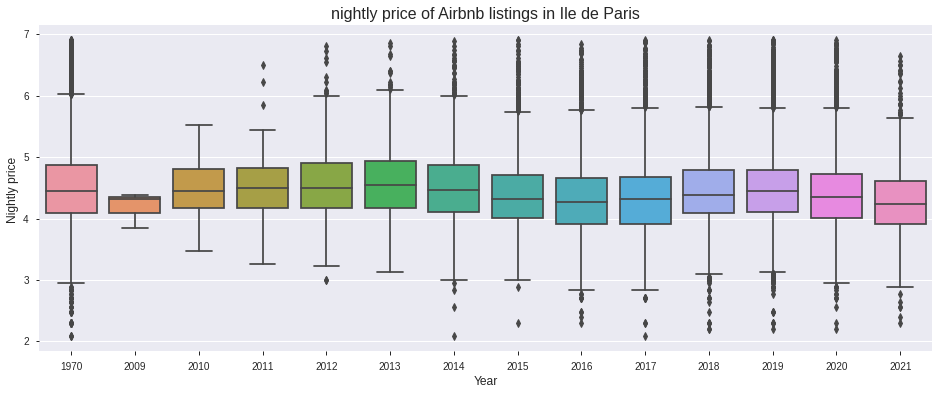

In [ ]:
data.first_review=pd.to_datetime(data.first_review)
plt.figure(figsize=(16,6))
sns.boxplot(data.first_review.dt.year, np.log(data.price))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Nightly price ', fontsize=12)
plt.title('nightly price of Airbnb listings in Ile de Paris', fontsize=16)
plt.show()

# Analyse des correlations entres les variables: 

In [ ]:
# from dataprep.eda import plot_correlation
# plot_correlation(data)

# En cliquant sur Pearson test on obtient une table de correlation entre les variables
# On constate que les variables avaibility30, avaibility60,avaibility90,avaibility360 sont correlés fortement entre eux
# l'ensemble des variables ont mauvaise corrélation
# price et accomodate sont corrélés

###commentaires:
on voit bien que la correlation entre les variables sont faiblement corréllés: la correlation moyenne selon test de person est 0.076 < 0.05, on rejete l'hypothése nulle (d'indépendance) 

#Correlations entre price et disponibilité 


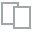
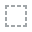
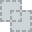
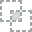
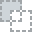
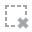
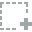
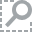
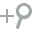
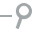
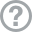
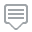
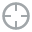
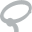
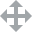
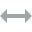
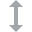
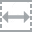
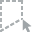
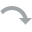
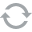
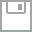
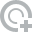
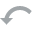
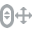
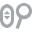
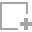
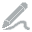
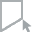
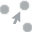
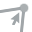
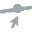

In [ ]:
x='price'
V = 'accommodates'
plot_correlation(data, x, V)
# Une dependance linéaire entre price et accommodates (Accuils), Cela affirme ce que nous avons dit précidement 
#Plus il y'a plusieurs points d'acceuils plus le prix est élévé 


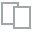
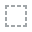
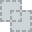
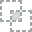
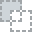
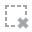
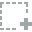
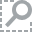
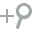
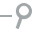
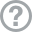
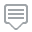
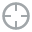
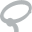
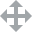
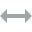
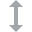
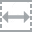
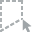
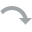
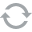
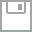
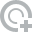
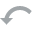
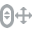
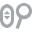
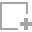
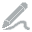
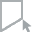
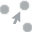
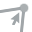
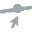

In [ ]:
L= 'has_availability'
x='price'

plot_correlation(data, x, L)
# une disponibilité forte pour les locations Airbnb de 20 euros jusqu'au 948
# le taux de non disponibilité est trés peu


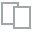
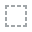
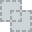
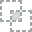
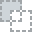
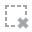
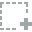
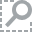
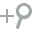
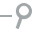
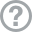
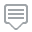
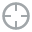
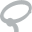
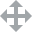
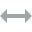
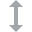
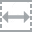
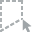
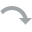
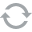
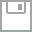
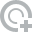
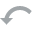
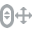
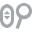
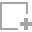
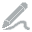
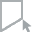
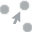
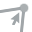
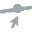

In [ ]:
x='price'
y='availability_365'
plot_correlation(data, x, y)
# Dependance lineaire entre disponibilité et le prix


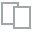
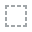
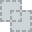
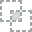
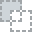
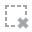
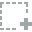
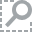
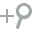
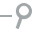
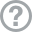
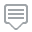
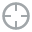
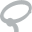
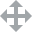
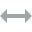
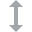
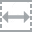
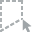
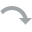
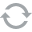
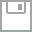
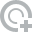
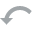
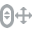
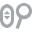
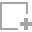
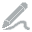
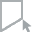
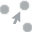
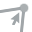
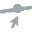

In [ ]:
H='price'
I='availability_60'
plot_correlation(data, H,I)
# 
#On voit dans le graphique que dans le cas de avaibility90 (disponibilité), plus la disponibilité est moin élévée, 
#le price est devients élévé .


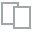
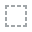
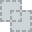
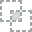
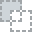
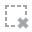
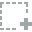
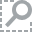
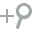
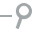
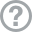
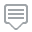
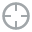
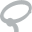
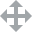
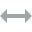
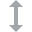
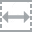
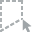
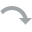
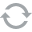
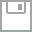
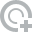
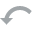
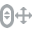
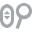
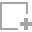
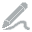
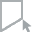
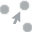
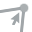
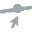

In [ ]:
Z='price'
F='availability_30'
plot_correlation(data, F,Z)

#On voit dans le graphique que dans le cas de avaibility30 (disponibilité), le prix est stable autour la moyenne de 110
# il ya aussi des valeurs aberrantes 
# on peut tracer une droite linéaire sur l'ensemble des individus 


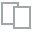
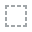
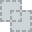
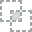
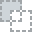
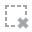
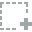
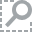
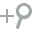
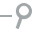
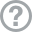
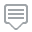
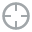
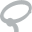
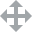
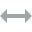
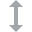
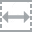
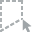
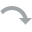
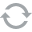
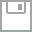
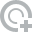
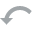
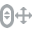
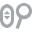
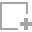
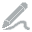
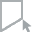
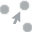
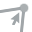
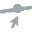

In [ ]:

J='price'
K='availability_90'
plot_correlation(data, J, K)
# 
#On voit dans le graphique que dans le cas de avaibility90 (disponibilité), plus la disponibilité est moin élévée, 
#le price devient élévé aussi pour un max de 150 euros.

#Map de disponibilités:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


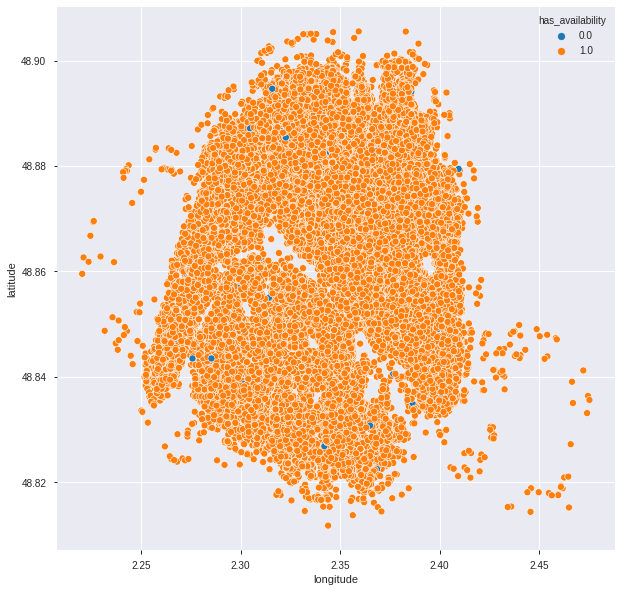

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data.longitude,data.latitude,hue=data.has_availability)
plt.ioff()

#On voit sur la carte ci-dessous la grande disponibilité de locations Airbnb sur ile de France 
# il y'a egalement un taux trés faible de non disponibilités representés en points bleux. 